In [4]:
pip install torch


   ---------------------------------------- 0.0/203.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/203.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/203.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/203.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/203.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/203.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/203.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/203.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/203.1 MB ? eta -:--:--
   ---------------------------------------- 0.5/203.1 MB 1.9 MB/s eta 0:01:49
   ---------------------------------------- 0.8/203.1 MB 2.0 MB/s eta 0:01:43
   ---------------------------------------- 0.8/203.1 MB 2.0 MB/s eta 0:01:43
   ---------------------------------------- 0.8/203.1 MB 2.0 MB/s eta 0:01:43
   ---------------------------------------- 0.8/


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install transformers -q


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from tensorflow import keras

In [3]:
import keras
print(keras.__version__)


3.6.0


In [4]:
import transformers
import torch

print(transformers.__version__)  # Debe ser 4.38+ para mejor compatibilidad
print(torch.__version__)         # Debe ser 2.0+ para evitar problemas con PyTorch


4.48.1
2.5.1+cpu


In [5]:
from transformers import pipeline

In [6]:
emotionModel = pipeline('text-classification', model="cardiffnlp/twitter-roberta-base-emotion", framework="pt") # model='SamLowe/roberta-base-go_emotions')

Device set to use cpu


In [7]:
# Prueba con un texto
result = emotionModel("I'm feeling very happy today!")
print(result)



[{'label': 'optimism', 'score': 0.9172263145446777}]


In [9]:
# Prueba con un texto
result = emotionModel(", ya que esto es exactamente lo que sucedio conmigo. La primera cosa que me golpeo sobre Oz fue ")
print(result)

[{'label': 'joy', 'score': 0.3273314833641052}]


In [22]:
label = emotionModel(["Hello, I'm not feeling fine", 'Today is a great day'])
label

[{'label': 'sadness', 'score': 0.9622675776481628},
 {'label': 'optimism', 'score': 0.8525602221488953}]

In [23]:
def get_emotion(text):
    return(emotionModel(text)[0]['label'])

In [24]:
get_emotion('This is hard')

'sadness'

In [25]:
import pandas as pd

In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv', encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [27]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.columns = ['label', 'text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: xlabel='label'>

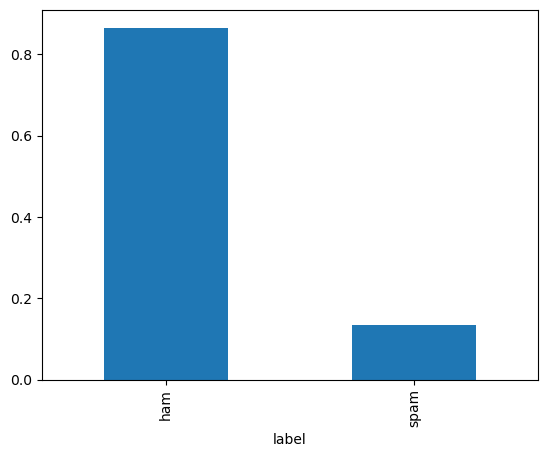

In [28]:
df['label'].value_counts(normalize = True).plot.bar()

## Conteo de palabras

In [29]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
display(df.head())

print(
    'ham',
    df[df['label'] == 'ham']['word_count'].describe()
)
print(
    'spam',
    df[df['label'] == 'spam']['word_count'].describe()
)

,label,text,word_count
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13


ham count    4825.000000
mean       14.200622
std        11.424511
min         1.000000
25%         7.000000
50%        11.000000
75%        19.000000
max       171.000000
Name: word_count, dtype: float64
spam count    747.000000
mean      23.851406
std        5.811898
min        2.000000
25%       22.000000
50%       25.000000
75%       28.000000
max       35.000000
Name: word_count, dtype: float64


# Conteo de caracteres

In [30]:
df['char_count'] = df['text'].apply(lambda x: len(str(x)))
print(
    'ham',
    df[df['label'] == 'ham']['char_count'].describe()
)
print(
    'spam',
    df[df['label'] == 'spam']['char_count'].describe()
)

ham count    4825.000000
mean       71.023627
std        58.016023
min         2.000000
25%        33.000000
50%        52.000000
75%        92.000000
max       910.000000
Name: char_count, dtype: float64
spam count    747.000000
mean     138.866131
std       29.183082
min       13.000000
25%      132.500000
50%      149.000000
75%      157.000000
max      224.000000
Name: char_count, dtype: float64


# Densidad de palabras

In [31]:
df['word_density'] = df['char_count'] / df['word_count']
df.head()

,label,text,word_count,char_count,word_density
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,5.550000
1,ham,Ok lar... Joking wif u oni...,6,29,4.833333
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,5.535714
3,ham,U dun say so early hor... U c already then say...,11,49,4.454545
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,4.692308


In [32]:
# Representación gráfica

In [33]:
import matplotlib.pyplot as plt
import numpy as np

In [34]:
df_ham = df[df['label'] == 'ham']
df_spam = df[df['label'] == 'spam']

In [35]:
df_ham

,label,text,word_count,char_count,word_density
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,5.550000
1,ham,Ok lar... Joking wif u oni...,6,29,4.833333
3,ham,U dun say so early hor... U c already then say...,11,49,4.454545
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,4.692308
6,ham,Even my brother is not like to speak with me. ...,16,77,4.812500
...,...,...,...,...,...
5565,ham,Huh y lei...,3,12,4.000000
5568,ham,Will Ì_ b going to esplanade fr home?,8,37,4.625000
5569,ham,"Pity, * was in mood for that. So...any other s...",10,57,5.700000
5570,ham,The guy did some bitching but I acted like i'd...,26,125,4.807692


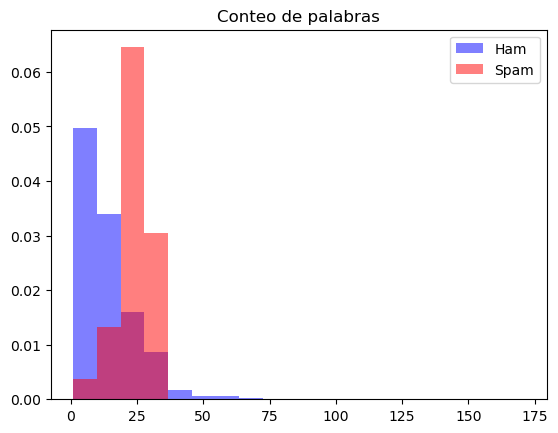

In [36]:
plt.figure()
plt.title('Conteo de palabras')
bins = np.linspace(np.min(df['word_count']), np.max(df['word_count']), 20)

plt.hist(df_ham['word_count'],  label = 'Ham', bins = bins, color = 'blue', alpha = 0.5, density = True)
plt.hist(df_spam['word_count'],  label = 'Spam', bins = bins, color = 'red', alpha = 0.5, density = True)
plt.legend()
plt.show()


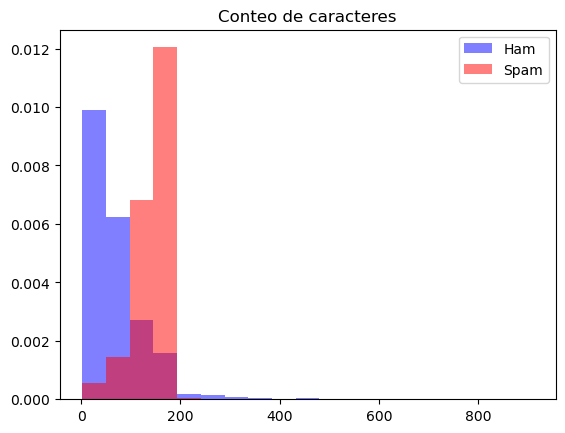

In [37]:
plt.figure()
plt.title('Conteo de caracteres')
bins = np.linspace(np.min(df['char_count']), np.max(df['char_count']), 20)

plt.hist(df_ham['char_count'],  label = 'Ham', bins = bins, color = 'blue', alpha = 0.5, density = True)
plt.hist(df_spam['char_count'],  label = 'Spam', bins = bins, color = 'red', alpha = 0.5, density = True)
plt.legend()
plt.show()

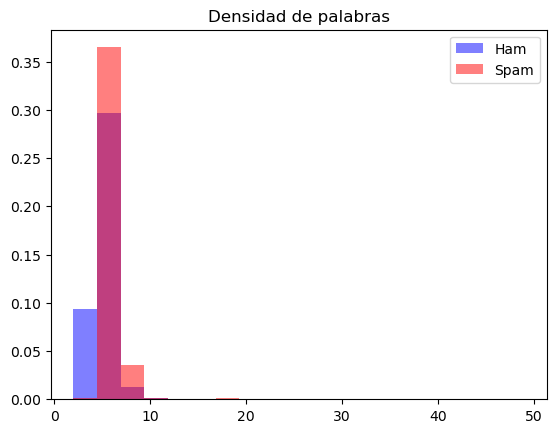

In [38]:
plt.figure()
plt.title('Densidad de palabras')
bins = np.linspace(np.min(df['word_density']), np.max(df['word_density']), 20)

plt.hist(df_ham['word_density'],  label = 'Ham', bins = bins, color = 'blue', alpha = 0.5, density = True)
plt.hist(df_spam['word_density'],  label = 'Spam', bins = bins, color = 'red', alpha = 0.5, density = True)
plt.legend()
plt.show()

In [39]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_per

True

In [40]:
text = list(df['text'])

In [41]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

corpus = []

In [42]:
for i in range(len(text)):
    r = re.sub('[^a-zA-Z]', ' ', text[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    corpus.append(r)

In [43]:
df['text_clean'] = corpus
df.head()

,label,text,word_count,char_count,word_density,text_clean
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,5.550000,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,6,29,4.833333,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,5.535714,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,11,49,4.454545,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,4.692308,nah think go usf life around though


# Entrenamiento y prueba

In [44]:
# Create Feature and Label sets
X = df['text_clean']
y = df['label']

# train test split (80% train - 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print('Training Data :', X_train.shape)
print('Testing Data : ', X_test.shape)

Training Data : (3900,)
Testing Data :  (1672,)


In [45]:
X_train

3784    let know need anything else salad desert somet...
2755                                    r outside already
757     faith make thing possible hope make thing work...
5403                        gd got free ice cream oso wan
3017                              get second half message
                              ...                        
4192                                       ok coming home
236                ill little closer like bus stop street
3404                                        jus chillaxin
788     free top polyphonic tone call national rate ge...
1741                   want please inside outside bedroom
Name: text_clean, Length: 3900, dtype: object

## Vectorización

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

Por ejemplo, `CountVectorizer` hace algo así:
# eso es to eso es to eso es todo amigos
# hola señorita


| | eso | es | to | todo | amigos | hola | señorita
| --- | --- | --- | --- | --- | --- | --- | ---
eso es to eso es to eso es todo amigos | 3 | 3 | 2 | 1 | 1 | 0 | 0
hola señorita | 0 | 0 | 0 | 0 | 0 | 1 | 1

In [47]:
# conteo de palabras
count_vect = CountVectorizer(analyzer='word')
count_vect.fit(X_train)
xtrain_count =  count_vect.transform(X_train)
xtest_count =  count_vect.transform(X_test)

# palabras
tfidf_vect = TfidfVectorizer(analyzer='word')
xtrain_tfidf =  tfidf_vect.fit_transform(X_train)
xtest_tfidf =  tfidf_vect.transform(X_test)

# ngramas
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', ngram_range=(2,3))
xtrain_tfidf_ngram =  tfidf_vect_ngram.fit_transform(X_train)
xtest_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)

# caracteres
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char')
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.fit_transform(X_train)
xtest_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_test)

In [48]:
# Devuelve las palabras únicas en orden alfabético
count_vect.get_feature_names_out()

array(['aa', 'aah', 'aaniye', ..., 'zoom', 'zouk', 'zyada'], dtype=object)

In [49]:
# Devuelve listas por cada oración con presencia (1)/ausencia (0) de las palabras
xtrain_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
from sklearn.linear_model import LogisticRegression

import pandas as pd
from sklearn import metrics

In [51]:
lr = LogisticRegression()
lr.fit(xtrain_count, y_train)

# generate predictions
predictions = lr.predict(xtest_count)

In [52]:
df_confusion = pd.DataFrame(metrics.confusion_matrix(y_test, predictions), index=['ham','spam'], columns=['ham_pred','spam_pred'])
df_confusion

,ham_pred,spam_pred
ham,1441,8
spam,26,197


In [53]:
pares = [
    ('conteo', xtrain_count, xtest_count),
    ('palabras', xtrain_tfidf, xtest_tfidf),
    ('ngramas', xtrain_tfidf_ngram, xtest_tfidf_ngram),
    ('caracteres', xtrain_tfidf_ngram_chars, xtest_tfidf_ngram_chars)
]

for datos in pares:
    lr.fit(datos[1], y_train)
    predictions = lr.predict(datos[2])
    df_confusion = pd.DataFrame(metrics.confusion_matrix(y_test, predictions), index=['ham','spam'], columns=['ham','spam'])
    print(datos[0], '\n', df_confusion, '\n')

conteo 
        ham  spam
ham   1441     8
spam    26   197 

palabras 
        ham  spam
ham   1440     9
spam    52   171 

ngramas 
        ham  spam
ham   1449     0
spam   188    35 

caracteres 
        ham  spam
ham   1431    18
spam   128    95 

